## State Level Corn Production

[USDA QuickStat API](https://quickstats.nass.usda.gov/api) allows us to query historical data and yield forecasts from the USDA. We have a sample dataset in `"state_level_1950_2020_corn_yield.csv"`
collected using the parameters:
```
{"sector_desc": "CROPS",
            "commodity_desc": "CORN",
            "group_desc": "FIELD CROPS",
            "short_desc": ["CORN, GRAIN - ACRES HARVESTED",
                           "CORN, GRAIN - PRODUCTION, MEASURED IN BU"],
            "domain_desc": "TOTAL",
            "agg_level_desc": "STATE"}
```
for the years from 1950 to 2020.

## Task 1 - explore the data

- How would you describe each record in the data?
- What quality checks would you do to the data?
  - Any surprises?
- Is the data easy to use?
  - How can we calculate the "yield = production (in bu) / area (in acres)"?

In [1]:
import pandas as pd
df = pd.read_csv("state_level_1950_2020_corn_yield.csv")

In [2]:
df.columns

Index(['Unnamed: 0', 'state_name', 'year', 'short_desc', 'Value'], dtype='object')

### Description of data

The data is in the long format where each record is a state/year/variable and one column has the value (stored in a string format).

In [4]:
df.short_desc.sample(5)

1328               CORN, GRAIN - ACRES HARVESTED
717     CORN, GRAIN - PRODUCTION, MEASURED IN BU
4620               CORN, GRAIN - ACRES HARVESTED
5512               CORN, GRAIN - ACRES HARVESTED
3365    CORN, GRAIN - PRODUCTION, MEASURED IN BU
Name: short_desc, dtype: object

In [5]:
pdf = df.pivot(index=["year", "state_name"],
               columns="short_desc",
               values="Value")

In [6]:
pdf.head(3)

short_desc      CORN, GRAIN - ACRES HARVESTED  \
year state_name                                 
1950 ALABAMA                        2,443,000   
     ARIZONA                           25,000   
     ARKANSAS                       1,337,000   

short_desc      CORN, GRAIN - PRODUCTION, MEASURED IN BU  
year state_name                                           
1950 ALABAMA                                  52,524,000  
     ARIZONA                                     375,000  
     ARKANSAS                                 31,420,000

In [7]:
pdf = pdf.reset_index()
pdf.sample(5)

short_desc,year,state_name,"CORN, GRAIN - ACRES HARVESTED","CORN, GRAIN - PRODUCTION, MEASURED IN BU"
1601,1987,KANSAS,"1,230,000","147,600,000"
1299,1979,WEST VIRGINIA,"59,000","5,251,000"
1272,1979,IOWA,"13,100,000","1,663,700,000"
2577,2010,NEW JERSEY,"71,000","8,094,000"
912,1970,MONTANA,"4,000","288,000"


In [8]:
pdf["area_acres"] = pdf["CORN, GRAIN - ACRES HARVESTED"].str.replace(",", "").astype(float)

In [11]:
import numpy as np
def str2float(val):
    try:
        val = float(val.replace(",", ""))
    except ValueError:
        val = np.nan
    return val

str2float(".   3")

nan

In [12]:
pdf["prod_bushels"] = pdf["CORN, GRAIN - PRODUCTION, MEASURED IN BU"].apply(str2float)

## Task 2 - Wrangle the data

Please wrangle the data so we can plot the change in yields over the years for each state.


In [13]:
pdf["yield_bu_acre"] = pdf.prod_bushels / pdf.area_acres

<AxesSubplot:xlabel='year', ylabel='yield_bu_acre'>

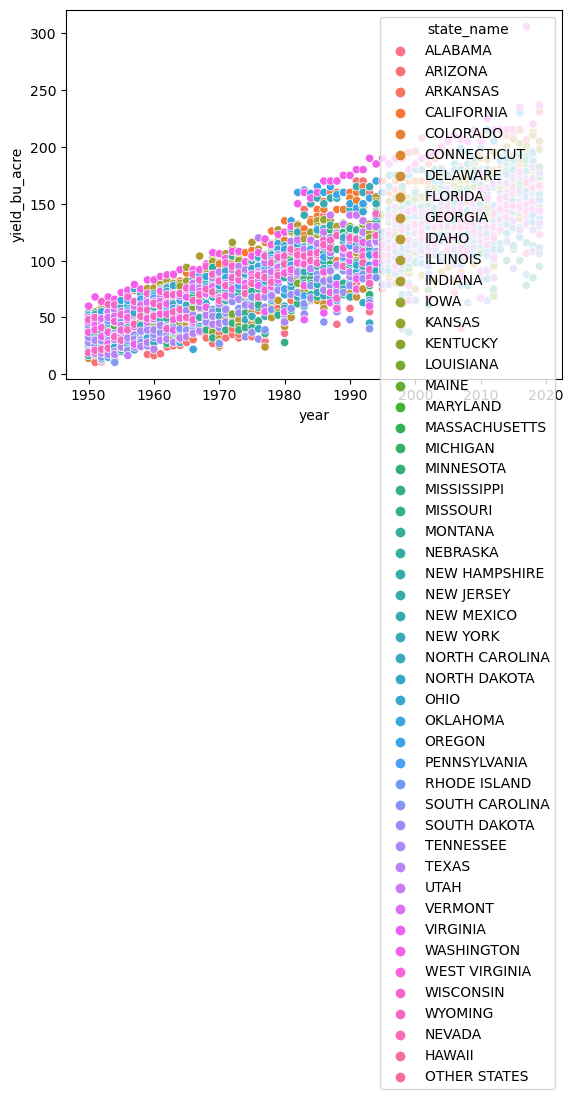

In [14]:
import seaborn as sns

sns.scatterplot(x="year", y="yield_bu_acre", hue="state_name",
                data=pdf)